# 生命游戏

这是个模拟生命演化的游戏，在一个广阔的生存空间里，设定生命群落存活和繁衍的规则，个体和群落依据既相互竞争又相互依存的法则进行进化。

## 总的规则

- 过于拥挤的分布 - 资源争夺 - 死亡
- 过于孤立的分布 - 不具备种群优势 - 灭绝
- 适度的分布 - 繁衍

## 规则细节


- 少于2邻居，死
- 多于3邻居，死
- 正好3邻居，生

## 创作者的解释

- [跳到1分钟处观看规则](http://bazhou.blob.core.windows.net/learning/mpp/414_Does_John_Conway_hate_his_Game_of_Life-E8kUJL04ELA.mp4 )

- [对于这个想法的来源（冯.诺伊曼）可以看这个视频](http://bazhou.blob.core.windows.net/learning/mpp/665_Inventing_Game_of_Life_-_Numberphile-R9Plq-D1gEk.mp4 )

## 交互体验

这个交互体验的目的是获得感官印象

- [体验游戏的过程是没有交互的](https://bitstorm.org/gameoflife/)，

## Wikipedia解释

如果已经明白规则，可以忽略这部分文档。

- [English version long](http://bazhou.blob.core.windows.net/learning/mpp/game_of_life_en.pdf)
- [汉语版本（短）](http://bazhou.blob.core.windows.net/learning/mpp/game_of_life_cn.pdf)

# 挑战

- 用Python实现游戏规则
  - 在1000x1000共一百万个单元里模拟
  - 边界为0
  - 不需要画图，只需要完成进化矩阵的运算即可
- 尽量短的代码
- 尽量高效

# 可以跳过下面全部的参考直接解决问题

## 参考一

[github搜索一个解](https://github.com/domoritz/gameoflife-python)

## 参考二

[Peter Norvig 的 notebook](https://nbviewer.jupyter.org/url/norvig.com/ipython/Life.ipynb)

## 参考三

[这个编程问题的96种语言实现](https://rosettacode.org/wiki/Conway%27s_Game_of_Life)

## 参考四

下面的代码是启发解，虽然不是最优解，但是

- 给出了算法的基本结构
  - 计算邻居数
  - 根据法则进化
- 循环结构指示了计算规模

In [7]:
import random as random
import timeit

# 产生一个百万0，1数组，0代表空（死），1代表生
Z = [[random.choice([0,1]) for x in range(1000)] for y in range(1000)]

# 计算八个邻居数目
def neighbours(Z):
    s = len(Z), len(Z[0])
    # 一个初始全为0的邻居数量矩阵
    N = [[0,]*(s[0]) for i in range(s[1])]
    for x in range(1, s[0]-1):                                  # 注意边界
        for y in range(1, s[1]-1):
            N[x][y] = (Z[x-1][y-1] + Z[x][y-1] + Z[x+1][y-1] +  # 邻居数量=周围8个格子生命统计
                       Z[x-1][y]               + Z[x+1][y]   +
                       Z[x-1][y+1] + Z[x][y+1] + Z[x+1][y+1])
    return N

# 根据周围邻居总数应用规则
def evolve(Z):
    s = len(Z), len(Z[0])
    N = neighbours(Z)
    for x in range(1, s[0]-1):
        for y in range(1, s[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3): # 灭亡规则
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:               # 繁衍规则
                Z[x][y] = 1
    return Z

print(timeit.timeit(lambda: evolve(Z), number=3))             # 对百万人口作三代进化，统计运算效率

5.720627777976915


## 尝试用Numpy解

In [226]:
import timeit
import numpy as np

Znp = np.random.randint(2, size=(1000,1000))

def np_solver(Z):
        return Z # 把实现填进来
    
print(timeit.timeit(lambda: np_solver(Znp), number=3))

3.1669915188103914e-06


At time level 1
At time level 2
At time level 3
0.889146002009511


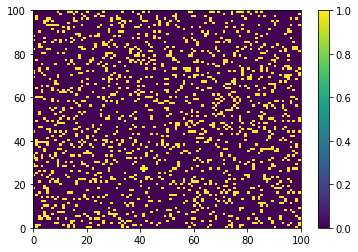

In [55]:
#  An implementation of Conway's Game of Life in Python.
#  Copyright (C) 2013 Christian Jacobs.

import numpy
import pylab
import random
import timeit

class GameOfLife:

   def __init__(self, N=100, T=3):

      """ Set up Conway's Game of Life. """
      # Here we create two grids to hold the old and new configurations.
      # This assumes an N*N grid of points.
      # Each point is either alive or dead, represented by integer values of 1 and 0, respectively.

      self.N = N
      self.old_grid = numpy.zeros(N*N, dtype='i').reshape(N,N)
      self.new_grid = numpy.zeros(N*N, dtype='i').reshape(N,N)

      self.T = T # The maximum number of generations

      # Set up a random initial configuration for the grid.
      for i in range(0, self.N):
         for j in range(0, self.N):
            if(random.randint(0, 100) < 15):
               self.old_grid[i][j] = 1
            else:
               self.old_grid[i][j] = 0

   def live_neighbours(self, i, j):
      """ Count the number of live neighbours around point (i, j). """
      s = 0 # The total number of live neighbours.

    # Loop over all the neighbours.
      for x in [i-1, i, i+1]:
         for y in [j-1, j, j+1]:
            if(x == i and y == j):
               continue # Skip the current point itself - we only want to count the neighbours!
            if(x != self.N and y != self.N):
               s += self.old_grid[x][y]

           # The remaining branches handle the case where the neighbour is off the end of the grid.
           # In this case, we loop back round such that the grid becomes a "toroidal array".
            elif(x == self.N and y != self.N):
               s += self.old_grid[0][y]
            elif(x != self.N and y == self.N):
               s += self.old_grid[x][0]
            else:
               s += self.old_grid[0][0]
      return s

   def play(self):

      """ Play Conway's Game of Life. """
      # Write the initial configuration to file.
      pylab.pcolormesh(self.old_grid)
      pylab.colorbar()
      pylab.savefig("generation0.png")

      t = 1 # Current time level
      write_frequency = 5 # How frequently we want to output a grid configuration.
      while t <= self.T: # Evolve!
            
         print( "At time level %d" % t)
        
        # Loop over each cell of the grid and apply Conway's rules.
        
         for i in range(self.N):
            for j in range(self.N):
               live = self.live_neighbours(i, j)
               if(self.old_grid[i][j] == 1 and live < 2):
                  self.new_grid[i][j] = 0 # Dead from starvation.
               elif(self.old_grid[i][j] == 1 and (live == 2 or live == 3)):
                  self.new_grid[i][j] = 1 # Continue living.
               elif(self.old_grid[i][j] == 1 and live > 3):
                  self.new_grid[i][j] = 0 # Dead from overcrowding.
               elif(self.old_grid[i][j] == 0 and live == 3):
                  self.new_grid[i][j] = 1 # Alive from reproduction.

         # Output the new configuration.
         if(t % write_frequency == 0):
            pylab.pcolormesh(self.new_grid)
            pylab.savefig("generation%d.png" % t)

         # The new configuration becomes the old configuration for the next generation.
         self.old_grid = self.new_grid.copy()

         # Move on to the next time level
         t += 1

if(__name__ == "__main__"):
   game = GameOfLife(N = 100, T = 3)
   #game.play()
   print(timeit.timeit(lambda: game.play(), number=1))

## 提示一

- 使用索引[1:-1,1:-1]可以消去邻居数循环

## 提示二

- [argwhere可以帮助作规则判断](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argwhere.html)

## 提示三

-[ravel是view](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html)

-[参考曾佑轩分享的关于Numpy性能的文章](https://zhuanlan.zhihu.com/p/28626431)

-[numpy.take](https://docs.scipy.org/doc/numpy/reference/generated/numpy.take.html)

-[numpy.compress](https://docs.scipy.org/doc/numpy/reference/generated/numpy.compress.html)